In [379]:
# Import packages, the Y-matrix for the dataset and Functions.py
import numpy as np
%run FB-messages_data_import.ipynb
import sys
sys.path.append('../')
from Functions import * 
import copy
import random
%store -r points
%store -r random_numbers_matrix

In [380]:
def LR(x):
    return np.exp(-x/80)*0.01+0.00001

In [381]:
num_samples = 1266
alpha = 2
dim = 12

In [382]:
True_posetiv = np.zeros(len(random_numbers_matrix))
True_negativ = np.zeros(len(random_numbers_matrix))
False_posetiv = np.zeros(len(random_numbers_matrix))
False_negativ = np.zeros(len(random_numbers_matrix))

True_posetiv_baseline = np.zeros(len(random_numbers_matrix))
True_negativ_baseline = np.zeros(len(random_numbers_matrix))
False_posetiv_baseline = np.zeros(len(random_numbers_matrix))
False_negativ_baseline = np.zeros(len(random_numbers_matrix))

True_posetiv_stupid_baseline = np.zeros(len(random_numbers_matrix))
True_negativ_stupid_baseline = np.zeros(len(random_numbers_matrix))
False_posetiv_stupid_baseline = np.zeros(len(random_numbers_matrix))
False_negativ_stupid_baseline = np.zeros(len(random_numbers_matrix))

In [383]:
for s in range(len(random_numbers_matrix)): #len(random_numbers_matrix)
    Y_updated = np.delete(Y,random_numbers_matrix[s].flatten().astype(int), axis=0)

    prev_grad = 1000000002
    grad = 0
    n = 100000
    points_copy = copy.deepcopy(points)
    grad_sum = np.zeros(n) # Define the gradient sum
    k = 0

    while abs(prev_grad - grad) > 1: # stopping criteria TOG 900 MIN MED 100
        print(prev_grad - grad)
        prev_grad = grad
        for i in range(1,num_samples+1): # Run over number of num_samples
            grad_now = Gradient_function_fast(i,dim,Y_updated,points_copy,alpha)
            grad_sum[k] += np.sum((grad_now)**2)
            points_copy[i] += LR((k+1))*grad_now # Use Gradient_function and take step=0.1*grad
        grad = grad_sum[k]
        k += 1

    connections = Y[random_numbers_matrix[s].flatten().astype(int), 0]
    point_a = [points_copy[i] for i in Y[random_numbers_matrix[s].flatten().astype(int),1]]
    point_b = [points_copy[i] for i in Y[random_numbers_matrix[s].flatten().astype(int),2]]
    points_a_np = np.array(point_a)
    points_b_np = np.array(point_b)

    distances = np.sum((points_a_np - points_b_np) ** 2, axis=1)
    sigmoid_value = 1 / (1 + np.exp(-1 * (alpha - distances)))

    True_posetiv[s] = np.sum(connections * sigmoid_value >= 0.5)
    False_posetiv[s] = np.sum(connections * sigmoid_value <= -0.5)
    True_negativ[s] = np.sum((connections * sigmoid_value > -0.5) & (connections * sigmoid_value < 0))
    False_negativ[s] = np.sum((connections * sigmoid_value >= 0) & (connections * sigmoid_value < 0.5))

    Baseline = Baseline_function(Y, random_numbers_matrix[s].flatten().astype(int), Y_updated)
    Baseline += 1
    True_posetiv_baseline[s] = np.sum(connections * Baseline >= 1.5)
    False_posetiv_baseline[s] = np.sum(connections * Baseline <= -1.5)
    True_negativ_baseline[s] = np.sum((connections * Baseline > -1.5) & (connections * Baseline <= -1))
    False_negativ_baseline[s] = np.sum((connections * Baseline >= 1) & (connections * Baseline < 1.5))

    count = sum(1 for row in Y_updated if row[0] == 1)
    True_posetiv_stupid_baseline[s] = np.sum(connections*count/len(Y_updated) >= 0.5)
    False_posetiv_stupid_baseline[s] = np.sum(connections*count/len(Y_updated) <= -0.5)
    True_negativ_stupid_baseline[s] = np.sum((connections*count/len(Y_updated) > -0.5) & (connections*count/len(Y_updated) <= 0))
    False_negativ_stupid_baseline[s] = np.sum((connections*count/len(Y_updated) > 0) & (connections*count/len(Y_updated) < 0.5))


1000000002
-16186375.034761542
12004469.183722246
1598068.3100534715
245020.18713328103
-17400.663475520443
19177.6439509294
114928.98775050836
181242.1783103128
198803.63301972812
243124.40973629733
276193.6199949335
278474.7464521233
258580.7747137351
223498.04294023686
185167.48615377973
160673.04437813757
128436.48203579475
42791.893419739354
5027.653881990533
2272.9448915214743
1983.629045198235
1814.3800821862897
1668.7602062518417
1539.7073305601298
1424.0657104548627
1319.8810197317362
1225.6025537046735
1139.9815034501662
1061.9950552810842
990.7931436334147
925.6560362455275
865.9615915102622
811.1620743025123
760.7696386246898
714.3483102052633
671.5097632691941
631.9104813948397
595.2486964429081
561.2604222071495
529.7146455121765
500.4081563495656
473.16058839679863
447.8101057955464
424.20994848831833
402.22584456483673
381.7341663508578
362.6206520026208
344.7795153599909
328.1127977172873
312.52985555730265
297.9469160987046
284.2866624442304
271.4778310845704
259.4548

In [385]:
%store -r sigmoid_value_prior
%store -r points_copy_prior
True_posetiv_prior = np.zeros(len(random_numbers_matrix))
True_negativ_prior = np.zeros(len(random_numbers_matrix))
False_posetiv_prior = np.zeros(len(random_numbers_matrix))
False_negativ_prior = np.zeros(len(random_numbers_matrix))

point_a = [points_copy_prior[i] for i in Y[random_numbers_matrix[s].flatten().astype(int),1]]
point_b = [points_copy_prior[i] for i in Y[random_numbers_matrix[s].flatten().astype(int),2]]
points_a_np = np.array(point_a)
points_b_np = np.array(point_b)

distances = np.sum((points_a_np - points_b_np) ** 2, axis=1)
sigmoid_value_prior = 1 / (1 + np.exp(-1 * (alpha - distances)))

True_posetiv_prior[s] = np.sum(connections*sigmoid_value_prior >= 0.5)
False_posetiv_prior[s] = np.sum(connections*sigmoid_value_prior <= -0.5)
True_negativ_prior[s] = np.sum((connections*sigmoid_value_prior > -0.5) & (connections*sigmoid_value_prior < 0))
False_negativ_prior[s] = np.sum((connections*sigmoid_value_prior >= 0) & (connections*sigmoid_value_prior < 0.5))

In [386]:
print('LDM no prior', np.array([[True_posetiv[s], False_negativ[s]],
        [False_posetiv[s], True_negativ[s]]]))
print('LDM prior', np.array([[True_posetiv_prior[s], False_negativ_prior[s]],
        [False_posetiv_prior[s], True_negativ_prior[s]]]))
print('Complex baseline', np.array([[True_posetiv_baseline[s], False_negativ_baseline[s]],
        [False_posetiv_baseline[s], True_negativ_baseline[s]]]))
print('Simple baseline', np.array([[True_posetiv_stupid_baseline[s], False_negativ_stupid_baseline[s]],
        [False_posetiv_stupid_baseline[s], True_negativ_stupid_baseline[s]]]))

LDM no prior [[0.0000e+00 1.8200e+02]
 [1.4000e+01 2.3826e+04]]
LDM prior [[1.0000e+00 1.8100e+02]
 [1.7000e+01 2.3823e+04]]
Complex baseline [[0.0000e+00 1.8200e+02]
 [9.0000e+00 2.3831e+04]]
Simple baseline [[    0.   182.]
 [    0. 23840.]]


In [387]:
print('Accuracy', (True_posetiv[s]+True_negativ[s])/(len(sigmoid_value)))
print('Accuracy_prior', (True_posetiv_prior[s]+True_negativ_prior[s])/(len(sigmoid_value)))
print('Accuracy_stupid_baseline', (True_posetiv_baseline[s]+True_negativ_baseline[s])/(len(sigmoid_value)))
print('Accuracy_stupid_baseline', (True_posetiv_stupid_baseline[s]+True_negativ_stupid_baseline[s])/(len(sigmoid_value)))

print('Recall', True_posetiv/(True_posetiv+False_posetiv))
print('Recall prior', True_posetiv_prior/(True_posetiv_prior+False_posetiv_prior))
print('Recall baseline', True_posetiv_baseline/(True_posetiv_baseline+False_posetiv_baseline))
print('Recall simple baseline', True_posetiv_stupid_baseline/(1))

print('Precision', True_posetiv/(True_posetiv+False_negativ))
print('Precision prior', True_posetiv_prior/(True_posetiv_prior+False_negativ_prior))
print('Precision baseline', True_posetiv_baseline/(True_posetiv_baseline+False_negativ_baseline))
print('Precision simple baseline', True_posetiv_stupid_baseline/(1))

Accuracy 0.9918408125884606
Accuracy_prior 0.9917575555740571
Accuracy_stupid_baseline 0.9920489551244692
Accuracy_stupid_baseline 0.9924236116892848
Recall [0.]
Recall prior [0.05555556]
Recall baseline [0.]
Recall simple baseline [0.]
Precision [0.]
Precision prior [0.00549451]
Precision baseline [0.]
Precision simple baseline [0.]


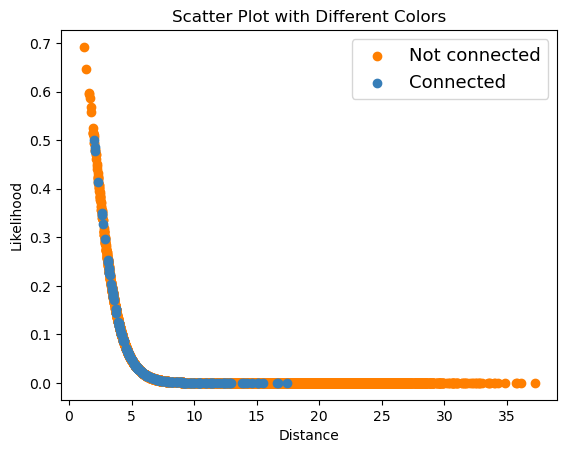

In [390]:
plt.scatter(distances[connections == -1], sigmoid_value[connections == -1], color='#ff7f00', label='Not connected')
plt.scatter(distances[connections == 1], sigmoid_value[connections == 1], color='#377eb8', label='Connected')
plt.xlabel('Distance')
#plt.xlim(4,5)
plt.ylabel('Likelihood')
plt.title('Scatter Plot with Different Colors')
plt.legend(fontsize=13)
plt.show()


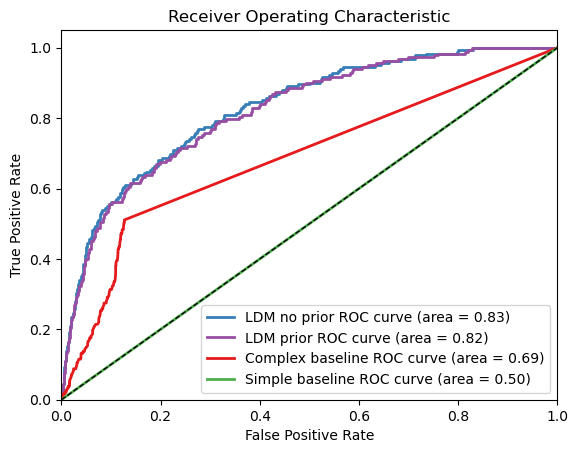

In [405]:
from sklearn.metrics import roc_curve, auc
# Compute FPR, TPR, and thresholds
y_true = copy.deepcopy(connections)
y_true[y_true == -1] = 0

# Compute ROC curve and AUC
fpr1, tpr1, _ = roc_curve(y_true, sigmoid_value)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_true, sigmoid_value_prior)
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, _ = roc_curve(y_true, Baseline)
roc_auc3 = auc(fpr3, tpr3)

fpr4, tpr4, _ = roc_curve(y_true, [count/len(Y_updated)]*len(y_true))
roc_auc4 = auc(fpr4, tpr4)

# Plot the ROC curve for all models
plt.figure()
plt.plot(fpr1, tpr1, color='#377eb8', lw=2, label='LDM no prior ROC curve (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='#984ea3', lw=2, label='LDM prior ROC curve (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='#e41a1c', lw=2, label='Complex baseline ROC curve (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, color='#4daf4a', lw=2, label='Simple baseline ROC curve (area = %0.2f)' % roc_auc4)
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [404]:
from sklearn.metrics import confusion_matrix
from statsmodels.stats.contingency_tables import mcnemar

# Sample data
y_pred1 = sigmoid_value >= 0.5
y_pred2 = sigmoid_value_prior >= 0.5
y_pred3 = Baseline >= 1.5
y_pred4 = np.array([count/len(Y_updated)]*len(y_true)) >= 0.5

# Create contingency table
contingency_table = confusion_matrix(y_pred3 == y_true, y_pred4 == y_true)
print("Contingency Table:\n", contingency_table)

# Perform McNemar test
result = mcnemar(contingency_table, exact=True)
print(f"p-value: {result.pvalue}")

# Interpretation
alpha = 0.05
if result.pvalue < alpha:
    print("There is a significant difference between the two classifiers.")
else:
    print("There is no significant difference between the two classifiers.")


Contingency Table:
 [[  182     9]
 [    0 23831]]
p-value: 0.00390625
There is a significant difference between the two classifiers.


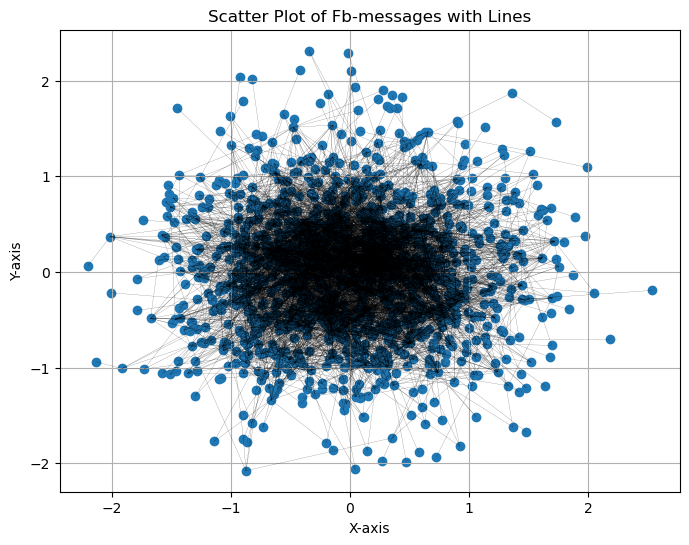

In [254]:
plt.figure(figsize=(8, 6))

for m in range(len(Y)): 
    if Y[m][0] == 1: # Check if there is a connection between Y[m][1] and Y[m][2]
        point1 = points_copy[Y[m][1]]
        point2 = points_copy[Y[m][2]]
        plt.plot([point1[0], point2[0]], [point1[1], point2[1]], color='black', linewidth=0.1) # Ad a line between Y[m][1] and Y[m][2]

# extract the points and plot them
x = [point[0] for point in points_copy.values()]
y = [point[1] for point in points_copy.values()]
plt.scatter(x, y)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Fb-messages with Lines')
plt.grid(True)
plt.show()